In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.initializers import he_normal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


In [2]:
#getting the size of input image
img_rows,img_cols = 28,28

#splitting the dataset
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


In [3]:
print('Number of images in training set are:',X_train.shape[0],'And shape of each image is {} x {}'.format(X_train.shape[1],X_train.shape[2]))
print('Number of images in test set are:',X_test.shape[0],'And shape of each image is {} x {}'.format(X_test.shape[1],X_test.shape[2]))

Number of images in training set are: 60000 And shape of each image is 28 x 28
Number of images in test set are: 10000 And shape of each image is 28 x 28


In [0]:
#as keras backend perceives incoming input to be of 4 dimensional tensor that's why we need to reshape the size 

if K.image_data_format() == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0],1,img_row,img_cols)
  X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
  input_shape = (1,img_rows,img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test =  X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)


In [5]:
X_train.shape
X_test.shape
#backend percieves other than channels first

(10000, 28, 28, 1)

5
0
4
1
9
2
1
3
1


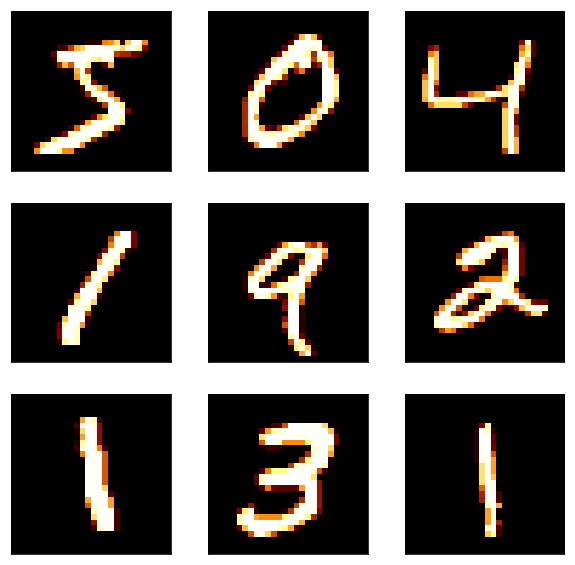

In [6]:
#display a plot number
plt.figure(figsize=(10,10))
rows = 3
cols= 3
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap="afmhot",interpolation="none")
    print(Y_train[i])
    #reshaping from 1D to 2D array
    plt.xticks([])
    plt.yticks([])

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('Shape of training data is',X_train.shape)
print(X_train.shape[0],'train_samples')
print(X_test.shape[0],'test_samples')

Shape of training data is (60000, 28, 28, 1)
60000 train_samples
10000 test_samples


In [8]:
#converting the labels into vectos using one hot encoding

from keras.utils import to_categorical

num_classes = 10
Y_train = to_categorical(Y_train,num_classes)
Y_test = to_categorical(Y_test,num_classes)
Y_train.shape

(60000, 10)

In [0]:
def classifier_1(n_kernel):
  model = Sequential()
  model.add(Conv2D(64,kernel_size = (n_kernel,n_kernel),activation = 'relu',kernel_initializer = he_normal(seed  = None),input_shape = input_shape))
  model.add(Conv2D(32,(n_kernel,n_kernel),activation = 'relu',kernel_initializer = he_normal(seed = None)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  #adding a flattening layer
  model.add(Flatten())
  model.add(Dense(128,activation = 'relu',kernel_initializer = he_normal(seed = None)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  #addding the output layer
  model.add(Dense(10,activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy',optimizer ='adam', metrics = ['accuracy'])

  return model




In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

batch_size = 100
epochs = 20
#writing the fucntion to perform parameter tuning and pass the argument of different kernel sizes as a list
n_kernel = [2,3,5,7,11]


model_gs = KerasClassifier(build_fn = classifier_1,batch_size = batch_size,epochs = epochs,verbose = 0)
param_grid = dict(n_kernel = n_kernel)
grid = GridSearchCV(estimator = model_gs,param_grid = param_grid,cv = 5,verbose = 1)
grid_result = grid.fit(X_train,Y_train)

end_time = time.time()
print('Time taken for execution of the hypereparamter searching is:',(end_time - start_time))


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 5 candidates, totalling 25 fits





[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


KeyboardInterrupt: ignored

In [11]:
#after getting the best kernel_size
# we need to evaluate it on the test data

#best_kernel_size is 7
batch_size = 100
epochs = 20
model = Sequential()
model.add(Conv2D(64,kernel_size = (7,7),activation = 'relu',kernel_initializer = he_normal(seed  = None),input_shape = input_shape))
model.add(Conv2D(32,(7,7),activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

  #adding a flattening layer
model.add(Flatten())
model.add(Dense(128,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
  
  #addding the output layer
model.add(Dense(10,activation = 'softmax'))
print(model.summary())


model.compile(loss = 'categorical_crossentropy',optimizer ='adam', metrics = ['accuracy'])
history = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = (X_test,Y_test),verbose = 1)








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 64)        3200      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        100384    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0        

Though we got an absolutely amazing accuracy of 99.31 % on test data,in the next model that we will build,data augmentation would be used on the data for better understanding the data

In [0]:
import pickle

import pickle
def savetofile(obj,filename):
  pickle.dump(obj,open(filename+".p",'wb'))
  
def openfromfile(filename):
  temp = pickle.load(open(filename+".p",'rb'))
  return temp


In [0]:
history1 = savetofile(history,'history_1')
model1 = savetofile(model,'model1')

In [14]:
model1 = openfromfile('model1')
score_model1 = model1.evaluate(X_test,Y_test)
print('Loss on test data is',score_model1[0])
print('Accuracy on test data is',score_model1[1])

10000/10000 [==============================] - 1s 89us/step
Loss on test data is 0.01964392685413427
Accuracy on test data is 0.9951


In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
#CNN with 5 layers

model = Sequential()

#1st and 2nd layer with maxpooling layer
model.add(Conv2D(32,kernel_size = 3,activation = 'relu',kernel_initializer = he_normal(seed = None),input_shape = input_shape))
model.add(Conv2D(32,kernel_size = 3,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#3rd and 4th layer with maxpooling layer
model.add(Conv2D(64,kernel_size = 2,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(Conv2D(64,kernel_size = 2,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#5th layer
model.add(Conv2D(128,kernel_size = 5,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#flattening adn adding another 2 dense layers with relu activation
model.add(Flatten())
model.add(Dense(256,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(Dropout(0.4))


model.add(Dense(128,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(Dropout(0.4))


#output layer
model.add(Dense(10,activation = 'softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        8256      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)       

In [17]:
#optimization for compilation

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = (X_test,Y_test),verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.7325 - acc: 0.7727 - val_loss: 0.1535 - val_acc: 0.9553
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1859 - acc: 0.9471 - val_loss: 0.1055 - val_acc: 0.9669
Epoch 3/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1418 - acc: 0.9615 - val_loss: 0.0475 - val_acc: 0.9845
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1171 - acc: 0.9675 - val_loss: 0.0447 - val_acc: 0.9873
Epoch 5/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1005 - acc: 0.9726 - val_loss: 0.0389 - val_acc: 0.9886
Epoch 6/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0924 - acc: 0.9747 - val_loss: 0.0388 - val_acc: 0.9886
Epoch 7/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0879 - acc: 0.9760 - val_loss: 0.0454 - 

In [0]:
history2 = savetofile(history,'history2')
model2 = savetofile(model,'model2')

In [19]:
model2 = openfromfile('model2')
score_model2 = model2.evaluate(X_test,Y_test)
print('Loss on test data is',score_model2[0])
print('Accuracy on test data is',score_model2[1])

10000/10000 [==============================] - 1s 112us/step
Loss on test data is 0.023159436680417637
Accuracy on test data is 0.9937


In [20]:
#arch 3
#building a 7 layer of Conv2d ,7 layers of maxpooling and 2 dense layers

model = Sequential()

model.add(Conv2D(16,kernel_size = 3,activation = 'relu',kernel_initializer = he_normal(seed = None),input_shape = input_shape))
model.add(MaxPooling2D(1,1))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Conv2D(32,kernel_size = 3,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(1,1))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Conv2D(64,kernel_size = 3,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(1,1))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Conv2D(96,kernel_size = 5,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(1,1))
model.add(BatchNormalization())
model.add(Dropout(0.3))




model.add(Conv2D(128,kernel_size = 5,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(160,kernel_size = 5,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))



#flattening adn adding another 2 dense layers with relu activation
model.add(Flatten())
model.add(Dense(256,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(128,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(Dropout(0.3))


#output layer
model.add(Dense(10,activation = 'softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 32)       

In [21]:
#optimization for compilation

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = (X_test,Y_test),verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 369us/step - loss: 0.5196 - acc: 0.8393 - val_loss: 0.0974 - val_acc: 0.9700
Epoch 2/20
60000/60000 [==============================] - 20s 329us/step - loss: 0.1517 - acc: 0.9543 - val_loss: 0.0607 - val_acc: 0.9809
Epoch 3/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.1020 - acc: 0.9699 - val_loss: 0.0464 - val_acc: 0.9860
Epoch 4/20
60000/60000 [==============================] - 19s 321us/step - loss: 0.0813 - acc: 0.9758 - val_loss: 0.0377 - val_acc: 0.9884
Epoch 5/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.0729 - acc: 0.9784 - val_loss: 0.0317 - val_acc: 0.9902
Epoch 6/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.0626 - acc: 0.9813 - val_loss: 0.0366 - val_acc: 0.9888
Epoch 7/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.0561 - acc: 0.9832 - val_loss: 0.

In [0]:
history3 = savetofile(history,'history3')
model3 = savetofile(model,'model3')

In [23]:
model3 = openfromfile('model3')

score_model3 = model1.evaluate(X_test,Y_test)
print('Loss on test data is',score_model3[0])
print('Accuracy on test data is',score_model3[1])

10000/10000 [==============================] - 1s 92us/step
Loss on test data is 0.01964392685413427
Accuracy on test data is 0.9951


In [0]:
#plotting all the results
def plots(model_h):


  plt.figure(figsize = (20,15))
  #plt.grid()
  x = list(range(1,epochs+1))

  #model loss
  plt.subplot(2,2,1)
  plt.title('MODEL LOSS')
  plt.grid()
  plt.plot(x,model_h.history['val_loss'],color = 'b',label = 'Validation Loss')
  plt.plot(x,model_h.history['loss'],color = 'r',label = 'Training loss')
  plt.xlabel('epochs')
  plt.ylabel('Categorical cross entropy')
  plt.legend()
  
  #model accuracy
  plt.subplot(2,2,2)
  plt.title('MODEL ACCURACY')
  plt.grid()
  plt.plot(x,model_h.history['acc'],color = 'b',label = 'Training accuracy')
  plt.plot(x,model_h.history['val_acc'],color = 'r',label = 'Validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()





MODEL 1


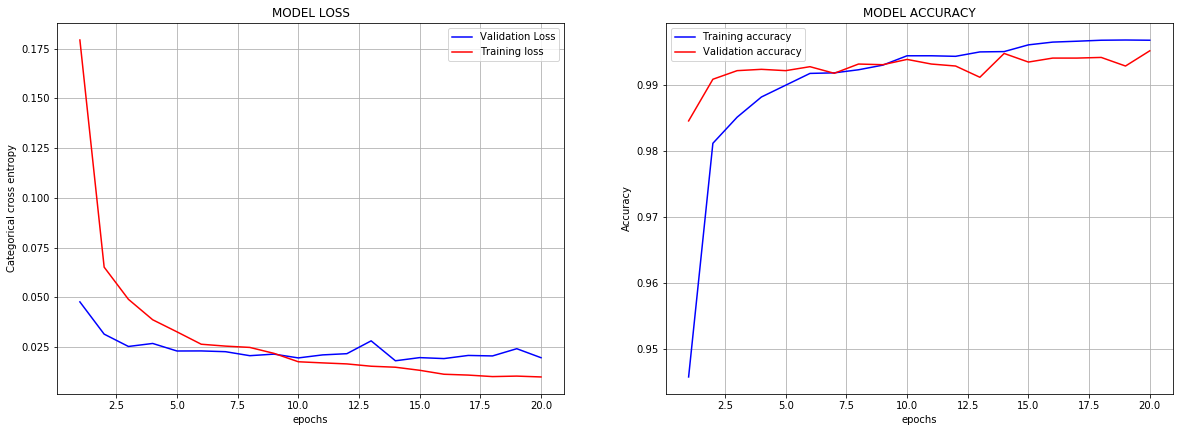

In [25]:
print('MODEL 1')
history1 = openfromfile('history_1')
plots(history1)

MODEL 2


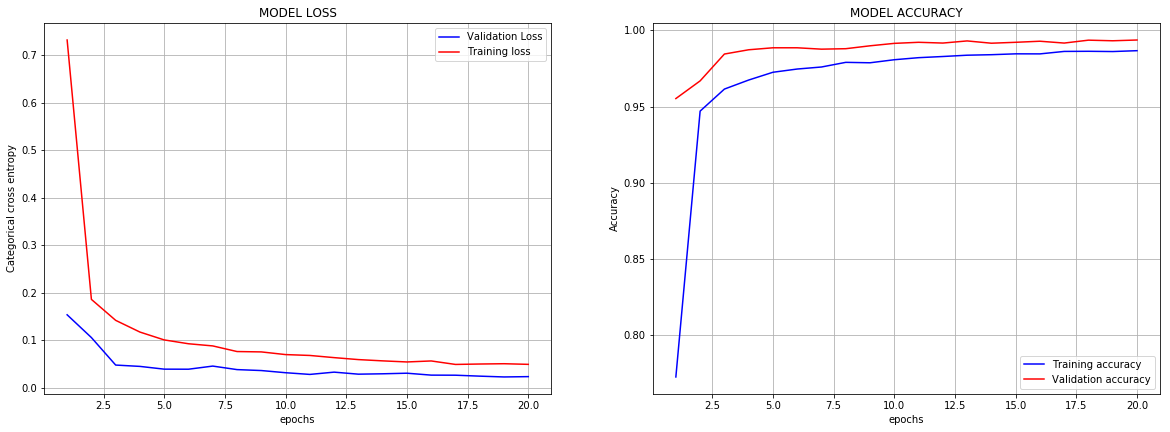

In [26]:
history2 = openfromfile('history2')
print('MODEL 2')
plots(history2)

MODEL 3


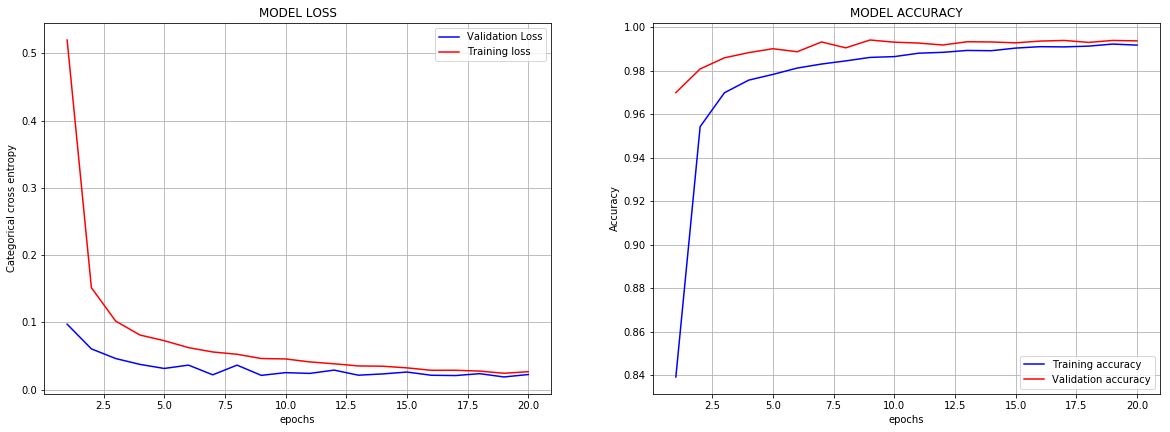

In [27]:
history3 = openfromfile('history3')
print('MODEL 3')
plots(history3)

## Best Model with Different parameters

- In this section we will use 3 different models each one following the same architecture but with different tuned parameters

## MODEL 1: Removing dropout and batchNormalization layers

In [28]:
model = Sequential()

#1st and 2nd layer with maxpooling layer
model.add(Conv2D(32,kernel_size = 3,activation = 'relu',kernel_initializer = he_normal(seed = None),input_shape = input_shape))
model.add(Conv2D(32,kernel_size = 3,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(2,2))


#3rd and 4th layer with maxpooling layer
model.add(Conv2D(64,kernel_size = 2,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(Conv2D(64,kernel_size = 2,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(2,2))



#5th layer
model.add(Conv2D(128,kernel_size = 5,activation = 'relu',kernel_initializer = he_normal(seed = None)))


#flattening adn adding another 2 dense layers with relu activation
model.add(Flatten())
model.add(Dense(256,activation = 'relu',kernel_initializer = he_normal(seed = None)))


model.add(Dense(128,activation = 'relu',kernel_initializer = he_normal(seed = None)))


#output layer
model.add(Dense(10,activation = 'softmax'))

print(model.summary())

batch_size = 100
epochs = 20

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics  = ['accuracy'])

history = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = [X_test,Y_test])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        8256      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 64)        16448     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 1, 128)        

In [0]:
history_11 = savetofile(history,'history11')
model_11 = savetofile(model,'model_11')

## MODEL2: Using Tanh activation function along with glorot normal weight initilization

In [30]:
#CNN with 5 layers
from keras.initializers import glorot_normal

model = Sequential()

#1st and 2nd layer with maxpooling layer
model.add(Conv2D(32,kernel_size = 3,activation = 'tanh',kernel_initializer = glorot_normal(seed = None),input_shape = input_shape))
model.add(Conv2D(32,kernel_size = 3,activation = 'tanh',kernel_initializer = glorot_normal(seed = None)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#3rd and 4th layer with maxpooling layer
model.add(Conv2D(64,kernel_size = 2,activation = 'tanh',kernel_initializer = glorot_normal(seed = None)))
model.add(Conv2D(64,kernel_size = 2,activation = 'tanh',kernel_initializer = glorot_normal(seed = None)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#5th layer
model.add(Conv2D(128,kernel_size = 5,activation = 'tanh',kernel_initializer = glorot_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#flattening adn adding another 2 dense layers with relu activation
model.add(Flatten())
model.add(Dense(256,activation = 'tanh',kernel_initializer = glorot_normal(seed = None)))
model.add(Dropout(0.4))


model.add(Dense(128,activation = 'tanh',kernel_initializer = glorot_normal(seed = None)))
model.add(Dropout(0.4))


#output layer
model.add(Dense(10,activation = 'softmax'))

print(model.summary())


model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics  = ['accuracy'])

history = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = [X_test,Y_test])





Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        8256      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 64)       

In [31]:
score = model.evaluate(X_test,Y_test)
print('Loss on test data is',score[0])
print('Accuracy on test data is',score[1])

10000/10000 [==============================] - 1s 77us/step
Loss on test data is 0.03541449715318158
Accuracy on test data is 0.9903


In [0]:
history_22 = savetofile(history,'history_22')
model_22 = savetofile(model,'model_22')

## MODEL 3: Using RMSPROP as optimizer

In [33]:
from keras.optimizers import RMSprop

#CNN with 5 layers

model = Sequential()

#1st and 2nd layer with maxpooling layer
model.add(Conv2D(32,kernel_size = 3,activation = 'relu',kernel_initializer = he_normal(seed = None),input_shape = input_shape))
model.add(Conv2D(32,kernel_size = 3,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#3rd and 4th layer with maxpooling layer
model.add(Conv2D(64,kernel_size = 2,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(Conv2D(64,kernel_size = 2,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#5th layer
model.add(Conv2D(128,kernel_size = 5,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#flattening adn adding another 2 dense layers with relu activation
model.add(Flatten())
model.add(Dense(256,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(Dropout(0.4))


model.add(Dense(128,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model.add(Dropout(0.4))


#output layer
model.add(Dense(10,activation = 'softmax'))

print(model.summary())

model.compile(loss = 'categorical_crossentropy',optimizer = 'RMSProp',metrics  = ['accuracy'])

history = model.fit(X_train,Y_train,batch_size = batch_size,epochs = epochs,validation_data = [X_test,Y_test])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_21 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        8256      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)       

In [34]:
score = model.evaluate(X_test,Y_test)
print('loss on test data is: ',score[0])
print('Accuracy on test data is:',score[1])

history_33 = savetofile(history,'history_33')
model_33 = savetofile(model,'model33')

10000/10000 [==============================] - 1s 78us/step
loss on test data is:  0.046560718773310396
Accuracy on test data is: 0.9907


In [0]:
def diff_ops(model_h,text):

  x = list(range(1,(epochs)+1))#definig the bin size on the x axis as we want to plot for each of the epochs
  plt.figure(figsize = (18,6))
  plt.grid()
  plt.plot(x,model_h.history['val_loss'],'b',label = 'Test loss')
  plt.plot(x,model_h.history['loss'],'r',label = 'Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Categorical Cross Entropy')
  plt.title(text)
  plt.legend(loc = 'best')
  plt.show()

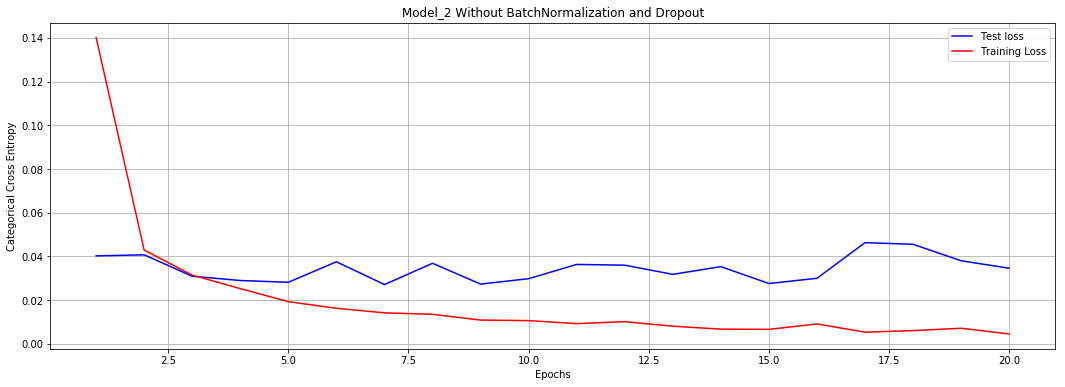

In [36]:
text = 'Model_2 Without BatchNormalization and Dropout'
diff_ops(openfromfile('history11'),text)


We removed the BatchNormalization layer and the Dropout layers for the best performing model,so as to experiment with overfitting of the model.As it can be clearly seen that model leraned well on the training data ,but performing generalization by this model was not as easy task.Though it gives an accuracy of 99.13 % on test data becuase of low complexity and unsophisticated MNIST data,but it can be clearly observed that the loss is fluctuating with each epoch like an unsmoothed sinusoidal wave.

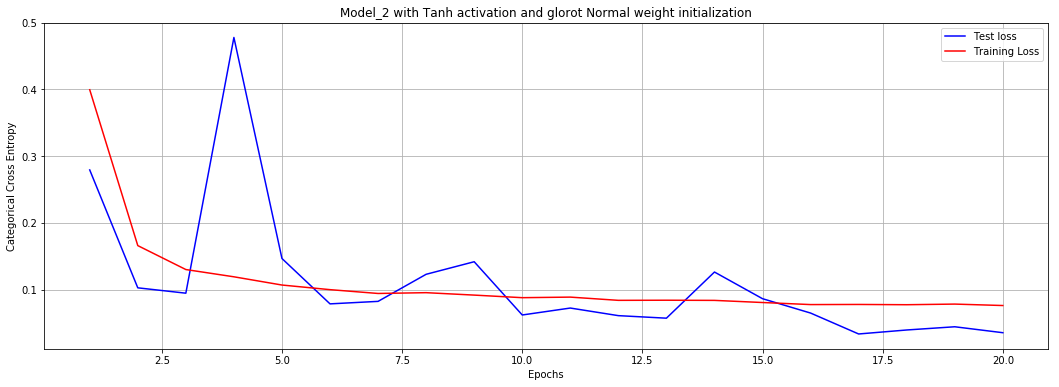

In [37]:
#plot_2
text = 'Model_2 with Tanh activation and glorot Normal weight initialization'
diff_ops(openfromfile('history_22'),text)

from the above graph we can clearly observe that using a different activation function 'Tanh' and initializing the weights using glorot deacreased the accuracy by 1%,though surprisingly the model performed better on test data than the train data after few initial epochs i.e generalization accuracy comes to be higher and loss lower in this case.
Sudden increase in the loss around 3rd epoch can be undertood from the concept of vanishing gradients.

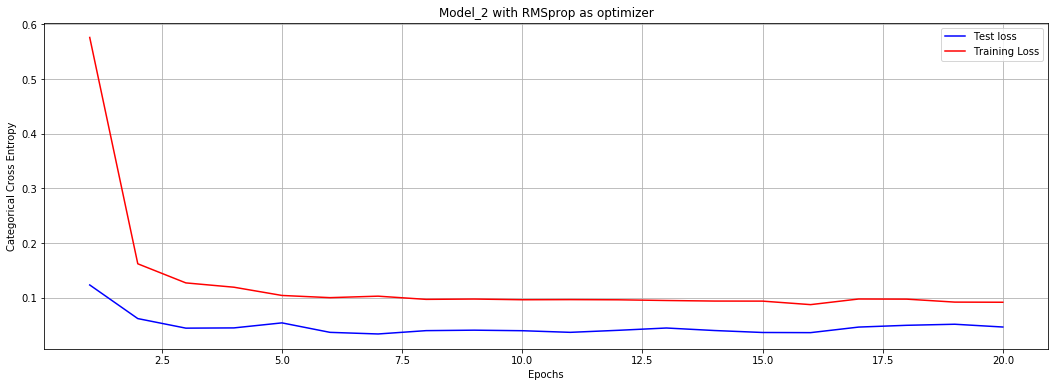

In [38]:
text = 'Model_2 with RMSprop as optimizer'
diff_ops(openfromfile('history_33'),text)

Here we see that using RMSProp as the optimizer instead of Adam has no significant impact,the accuracy on test is more or less same,also the execution time on test data is also same.As the data we are using is trivial ,that's why RMSProp also converges fastly.

# Conclusion

In [41]:

from prettytable import PrettyTable

table_arch1 = PrettyTable()
models = ['2 Convolution layers + 1 pooling layer  + 1 Dense layer + Adam ','5 Convolution layers + 2 pooling layer + 2 Dense Layers +Adam ',\
          '6 Convolution layers + 1 6 pooling layers + 2 Dense Layers + Adam']
tr_loss = [history1.history['loss'][19],history2.history['loss'][19],history3.history['loss'][19]]
tr_acc = [history1.history['acc'][19],history2.history['acc'][19],history3.history['acc'][19]]
te_loss = [score_model1[0],score_model2[0],score_model3[0]]
te_acc = [score_model1[1],score_model2[1],score_model3[1]]

table_arch1.add_column('Model',models)
table_arch1.add_column('trainig loss',tr_loss)
table_arch1.add_column('Training Accuracy(%)',tr_acc)
table_arch1.add_column('Test loss',te_loss)
table_arch1.add_column('Test_Accuracy(%)',te_acc)
print('\t\t\t\t\t\t\t\t 3 Different CNN architectures')
print(table_arch1)
print('\n\n\n')


#table after tuning the best performing model

score_model11 = openfromfile('model_11').evaluate(X_test,Y_test,verbose = 0)
score_model22 = openfromfile('model_22').evaluate(X_test,Y_test,verbose = 0)
score_model33 = openfromfile('model33').evaluate(X_test,Y_test,verbose = 0)

table_arch2 = PrettyTable()
models = ['Model_2 without BatchNormalization and Dropout','Model_2 with using Tanh activation and glorot normal weight initializer ',\
          'Model_2 with RMSProp optimizer']
tr_loss = [openfromfile('history11').history['loss'][19],openfromfile('history_22').history['loss'][19],openfromfile('history_33').history['loss'][19]]
tr_acc = [openfromfile('history11').history['acc'][19],openfromfile('history_22').history['acc'][19],openfromfile('history_33').history['acc'][19]]
te_loss = [score_model11[0],score_model22[0],score_model33[0]]
te_acc = [score_model11[1],score_model22[1],score_model33[1]]

table_arch2.add_column('Model',models)
table_arch2.add_column('trainig loss',tr_loss)
table_arch2.add_column('Training Accuracy(%)',tr_acc)
table_arch2.add_column('Test loss',te_loss)
table_arch2.add_column('Test_Accuracy(%)',te_acc)
print('\t\t\t\t\t\t\t\t Different output of best performing model')
print(table_arch2)
print('\n\n\n')





								 3 Different CNN architectures
+-------------------------------------------------------------------+----------------------+----------------------+----------------------+------------------+
|                               Model                               |     trainig loss     | Training Accuracy(%) |      Test loss       | Test_Accuracy(%) |
+-------------------------------------------------------------------+----------------------+----------------------+----------------------+------------------+
|  2 Convolution layers + 1 pooling layer  + 1 Dense layer + Adam   | 0.009973527063508906 |  0.9967000031471253  | 0.01964392685413427  |      0.9951      |
|   5 Convolution layers + 2 pooling layer + 2 Dense Layers +Adam   | 0.04901980113451524  |  0.9867000102003416  | 0.023159436680417637 |      0.9937      |
| 6 Convolution layers + 1 6 pooling layers + 2 Dense Layers + Adam |  0.0268287254908743  |  0.9918500073750813  | 0.01964392685413427  |      0.9951      |
+------------

#observation
A 10 layer CNN which consists of 5 Convolutional layers and 2 maxpooling layers and Dense layers with relu activation and a final softmax output layer  gives us the best accuracy of 99.5% on test data and a test loss of 0.018 .BatchNormalization and Dropout rate helps us in avoiding overfitting in such a complex architecture.This also gives us insight of how we can further tune the
dropout rates kernel sizes and  model with 7 Convolutional layers which is our 3rd model with.We also tried the GridSearch Cross validation on our first model with different kernel sizes,though it increases the training time by huge margin.A subsequent tuning may result in less time complexity

We also observe that removing BatchNormalization and dropout layers from the best performing model leads to overffitting and slow convergence by the model.using Tanh activation and glorot normal weight initialization decreases the accuracy by 1% to 98% where on an average we were getting the accuracy of 99%,which shos that how significant activation function is while initializing the model.RMSprop instead of AdamOptimizer does not have any major impact,and everything remains same more or less.